# Bank Marketing Data Analysis

## Data exploration

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [17]:
df = pd.read_csv('data/bank_data.csv', sep=';')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are 20 columns. 10 are categorical and 10 are numeric. 'y' is the target variable.

In [19]:
df.sample(10).transpose()

,5750,13459,8373,30428,24180,36406,31067,8424,3725,18560
age,35,36,31,56,46,24,38,36,48,33
job,admin.,technician,blue-collar,entrepreneur,admin.,technician,admin.,blue-collar,admin.,admin.
marital,single,divorced,single,married,married,single,married,single,single,divorced
education,high.school,basic.9y,high.school,university.degree,high.school,professional.course,high.school,basic.9y,university.degree,high.school
default,no,no,no,no,unknown,no,no,unknown,no,no
housing,yes,no,yes,yes,yes,yes,no,no,no,no
loan,no,no,no,yes,no,no,no,no,yes,yes
contact,telephone,telephone,telephone,cellular,cellular,cellular,cellular,telephone,telephone,cellular
month,may,jul,jun,apr,nov,jun,may,jun,may,jul
day_of_week,mon,wed,tue,thu,mon,tue,wed,tue,fri,thu


Are there any missing values?

In [20]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Let's convert the output label into a numeric label

In [58]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

How many unique values does each column contain?

In [40]:
for col in df.columns:
    print('{:15} : {:5} {:}'.format(col, df[col].nunique(), df[col].dtype))

age             :    78 int64
job             :    12 object
marital         :     4 object
education       :     8 object
default         :     3 object
housing         :     3 object
loan            :     3 object
contact         :     2 object
month           :    10 object
day_of_week     :     5 object
duration        :  1544 int64
campaign        :    42 int64
pdays           :    27 int64
previous        :     8 int64
poutcome        :     3 object
emp.var.rate    :    10 float64
cons.price.idx  :    26 float64
cons.conf.idx   :    26 float64
euribor3m       :   316 float64
nr.employed     :    11 float64
y               :     2 int64


### Information about the categorical features:

In [41]:
for col in df.columns:
    if df[col].nunique() < 20:
        print('=======================================')
        print(col)
        print('---------------------------------------')
        print(round(1e2*df[col].value_counts()/len(df),2))

job
---------------------------------------
admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64
marital
---------------------------------------
married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64
education
---------------------------------------
university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64
default
---------------------------------------
no         79.12
unknown    20.87
yes         0.01
Name: default, dtype: float64
housing
---------------------------------------
yes        52

In [42]:
categorical_columns = df.drop('y', axis=1).select_dtypes(include=['object']).columns

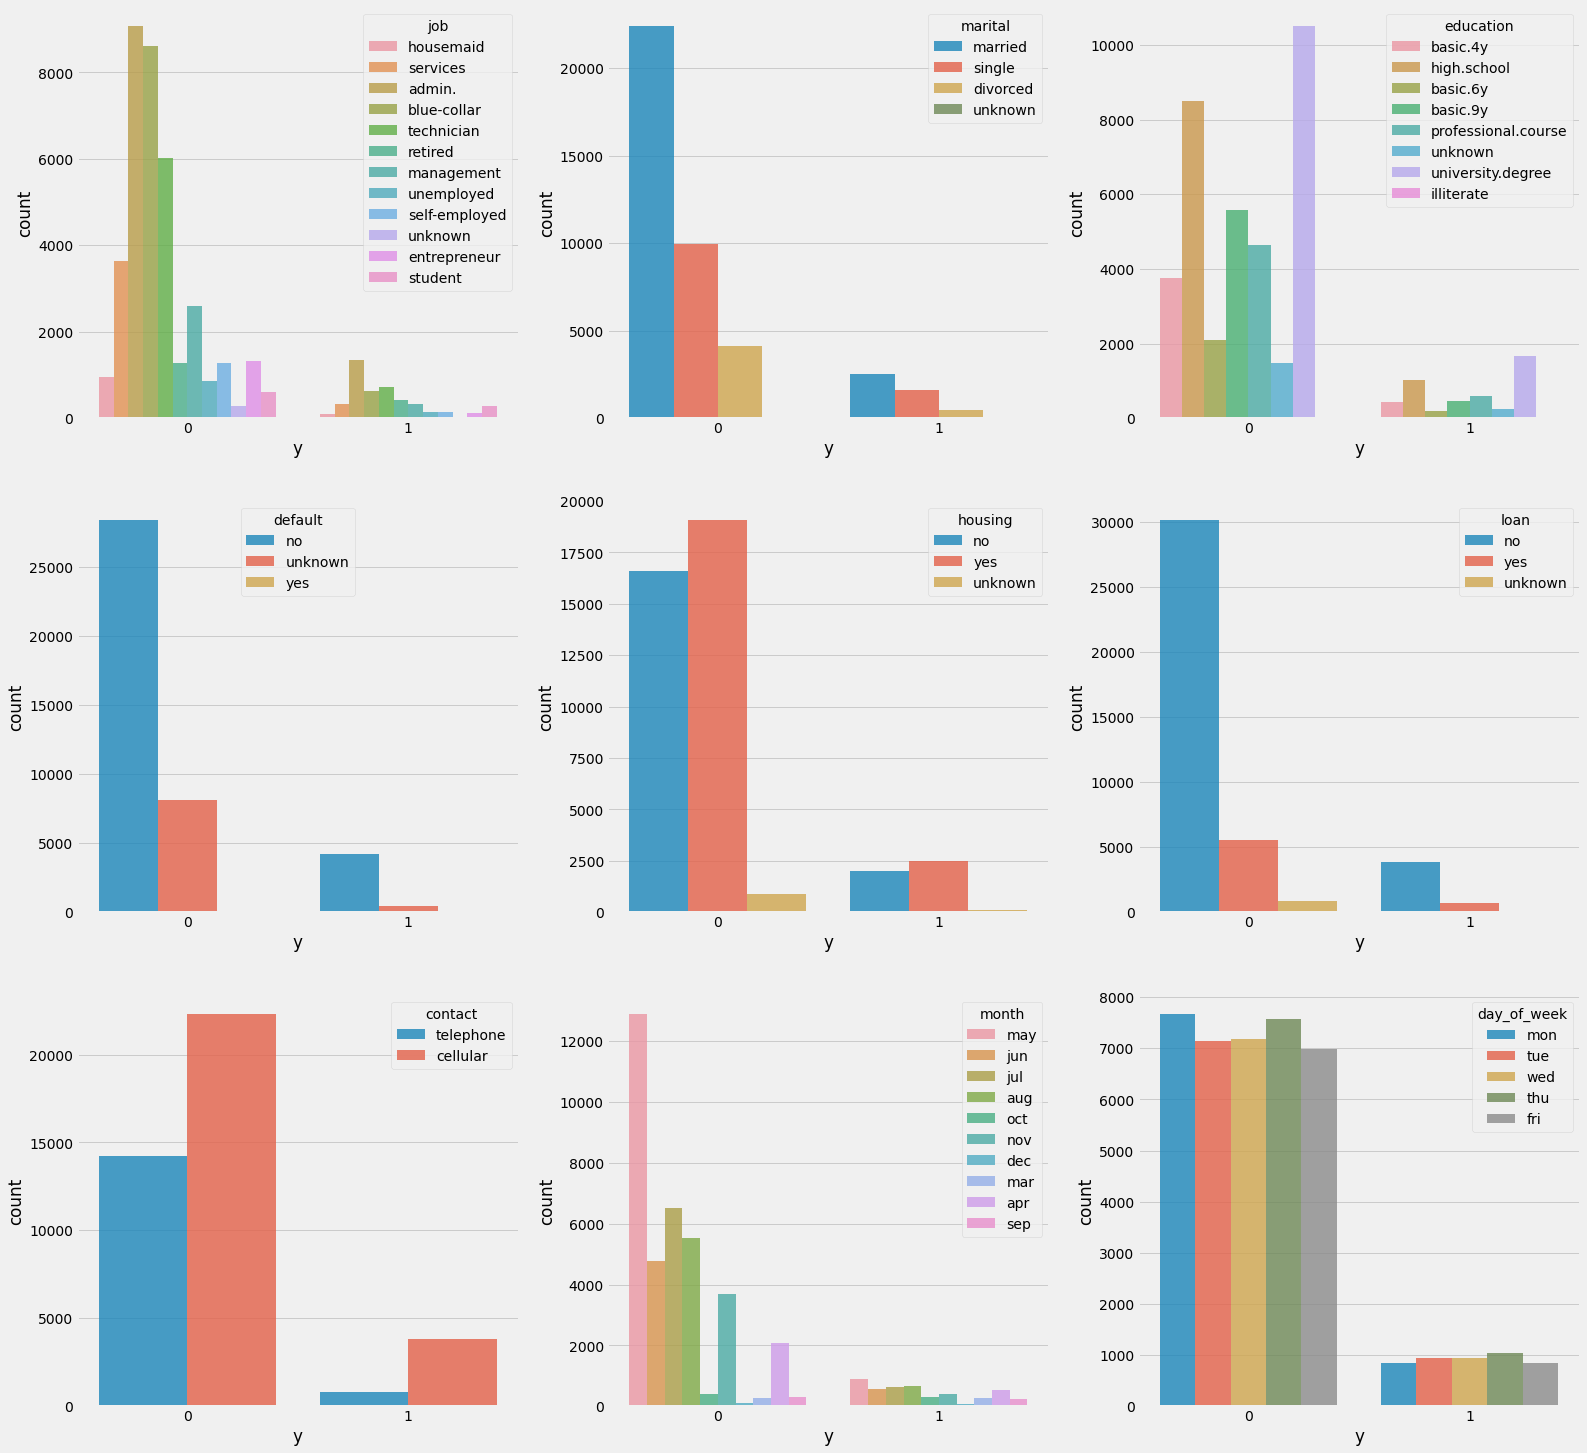

In [43]:
new_cat_list = []
for idx in range(4):
    new_cat_list.append(categorical_columns[3*idx: 3*idx+3])

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,24))
for i in range(3):
    for j in range(3):
        sns.countplot(x='y', hue=new_cat_list[i][j], data=df, ax=axs[i,j], alpha=.8)
plt.show()

### Information about the numeric features:

In [44]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


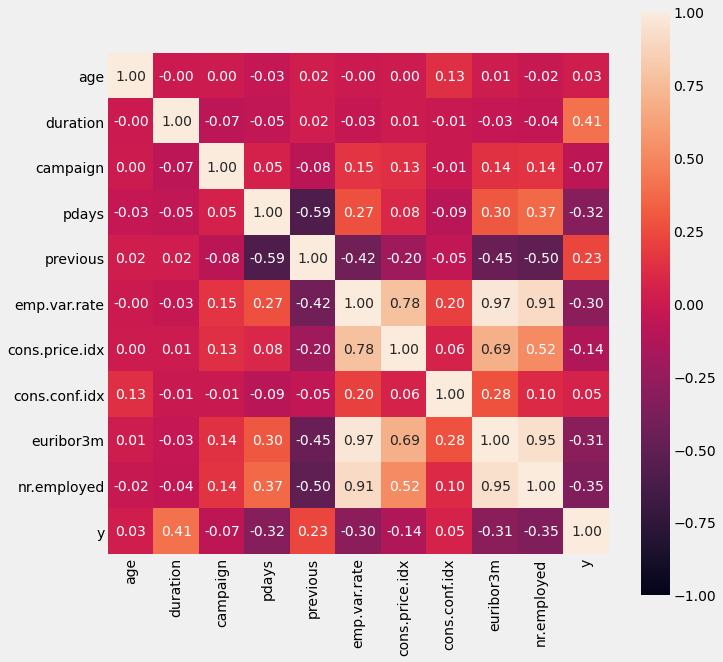

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', vmax=1, vmin=-1);